In [1]:
# Import nedeed packages
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import requests

import tensorflow as tf
from tensorflow.keras import layers, models

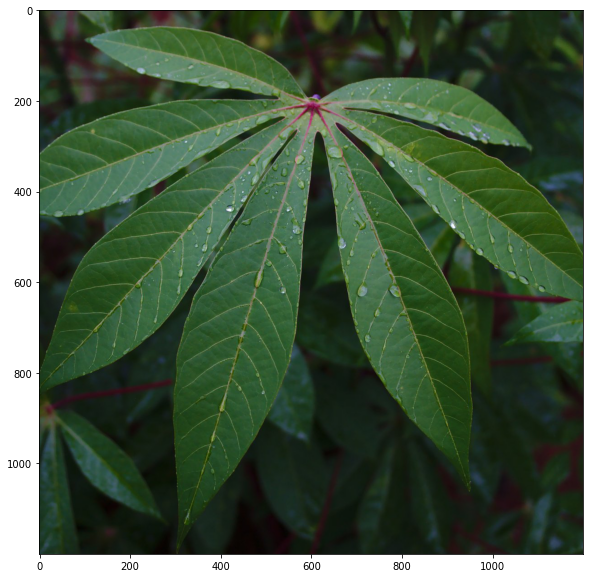

In [2]:
# get an image from an url
img = Image.open(requests.get('https://images.freeimages.com/images/large-previews/c14/cassava-leaf-1634171.jpg', stream=True).raw)
# plot it 
plt.figure(figsize=(14, 10))
plt.imshow(img)
plt.show()


In [3]:
#Convert the image into an tensor
img_tensor = tf.convert_to_tensor(np.array(img))
# then reshape it to (samples, width, height, channels) shape
# adding dimension 0
img_tensor = tf.expand_dims(img_tensor, 0)

FLIPPING

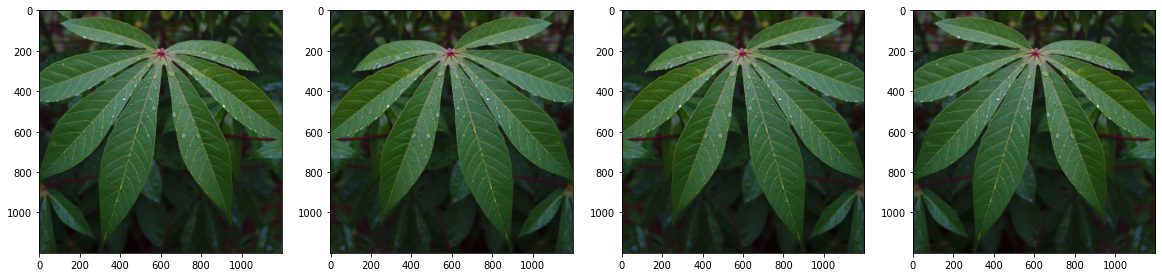

In [4]:
flip_hv = layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical")
flip_h = layers.experimental.preprocessing.RandomFlip("horizontal")
flip_v = layers.experimental.preprocessing.RandomFlip("vertical")
flipped_img_hv = flip_hv(img_tensor)
flipped_img_h = flip_h(img_tensor)
flipped_img_v = flip_v(img_tensor)

plt.figure(figsize=(20, 20))
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.subplot(1, 4, 2)
plt.imshow(flipped_img_hv[0])
plt.subplot(1, 4, 3)
plt.imshow(flipped_img_h[0])
plt.subplot(1, 4, 4)
plt.imshow(flipped_img_v[0])
plt.show()

RESIZING / CROPPING

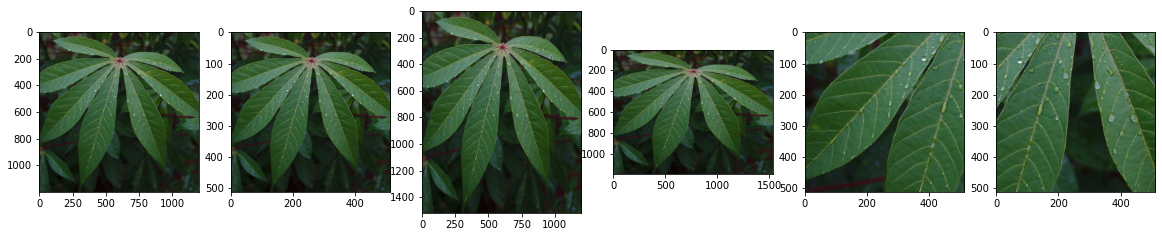

In [5]:
resize_layer = tf.keras.layers.experimental.preprocessing.Resizing(512, 512, interpolation="nearest")
resize_h = tf.keras.layers.experimental.preprocessing.RandomHeight(factor = (0.2, 0.3), interpolation="nearest")
resize_w = tf.keras.layers.experimental.preprocessing.RandomWidth(factor = (0.2, 0.3), interpolation="nearest")
random_crop = tf.keras.layers.experimental.preprocessing.RandomCrop(512, 512)
center_crop = tf.keras.layers.experimental.preprocessing.CenterCrop(512, 512)

resized_img = resize_layer(img_tensor)
resized_img_h = resize_h(img_tensor)
resized_img_w = resize_w(img_tensor)
random_cropped_img = random_crop(img_tensor)
center_cropped_img = center_crop(img_tensor)


plt.figure(figsize=(20, 20))
plt.subplot(1, 6, 1)
plt.imshow(img)
plt.subplot(1, 6, 2)
plt.imshow(resized_img[0])
plt.subplot(1, 6, 3)
plt.imshow(resized_img_h[0])
plt.subplot(1, 6, 4)
plt.imshow(resized_img_w[0])
plt.subplot(1, 6, 5)
plt.imshow(random_cropped_img[0])
plt.subplot(1, 6, 6)
plt.imshow(center_cropped_img[0])
plt.show()

TRANSLATION

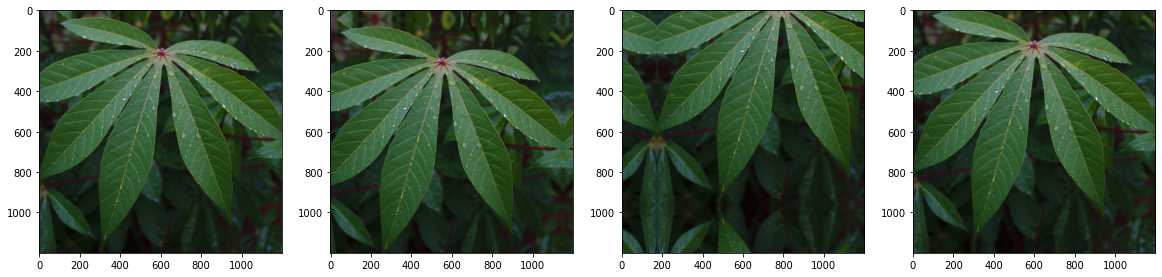

In [6]:
tr_layer1 = tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor = (-0.2, 0.2),  width_factor = (-0.2, 0.2), interpolation='nearest')
tr_layer2 = tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor = 0.2,  width_factor = 0.2, interpolation='nearest')
tr_layer3 = tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor = 0.1,  width_factor = 0.1, interpolation='nearest')

tr_img1 = tr_layer1(img_tensor)[0]
tr_img2 = tr_layer2(img_tensor)[0]
tr_img3 = tr_layer3(img_tensor)[0]

plt.figure(figsize=(20, 20))
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.subplot(1, 4, 2)
plt.imshow(tr_img1)
plt.subplot(1, 4, 3)
plt.imshow(tr_img2)
plt.subplot(1, 4, 4)
plt.imshow(tr_img3)
plt.show()

ZOOMING

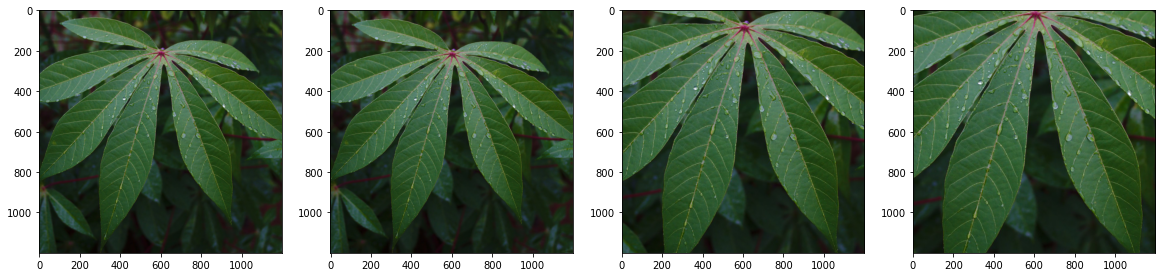

In [7]:
zoom_layer1 = tf.keras.layers.experimental.preprocessing.RandomZoom((-0.2, 0.2), interpolation='nearest')
zoom_layer2 = tf.keras.layers.experimental.preprocessing.RandomZoom( 0.3, interpolation='nearest')
zoom_layer3 = tf.keras.layers.experimental.preprocessing.RandomZoom( -0.4, interpolation='nearest')
zoomed_img1 = zoom_layer1(img_tensor)[0]
zoomed_img2 = zoom_layer2(img_tensor)[0]
zoomed_img3 = zoom_layer3(img_tensor)[0]
plt.figure(figsize=(20, 20))
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.subplot(1, 4, 2)
plt.imshow(zoomed_img1)
plt.subplot(1, 4, 3)
plt.imshow(zoomed_img2)
plt.subplot(1, 4, 4)
plt.imshow(zoomed_img3)
plt.show()


ROTATION

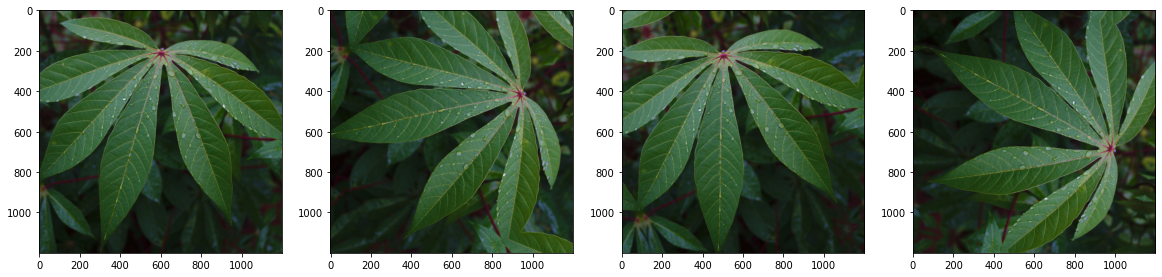

In [8]:
rot_layer1 = layers.experimental.preprocessing.RandomRotation(factor=(-0.2, 0.2), interpolation='nearest')
rot_layer2 = layers.experimental.preprocessing.RandomRotation(factor=(0, 0.2), interpolation='nearest')
rot_layer3 = layers.experimental.preprocessing.RandomRotation(factor=(-0.5, -0.2), interpolation='nearest')
rot_img1 = rot_layer1(img_tensor)[0]
rot_img2 = rot_layer2(img_tensor)[0]
rot_img3 = rot_layer3(img_tensor)[0]

plt.figure(figsize=(20, 20))
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.subplot(1, 4, 2)
plt.imshow(rot_img1)
plt.subplot(1, 4, 3)
plt.imshow(rot_img2)
plt.subplot(1, 4, 4)
plt.imshow(rot_img3)
plt.show()

CONTRAST

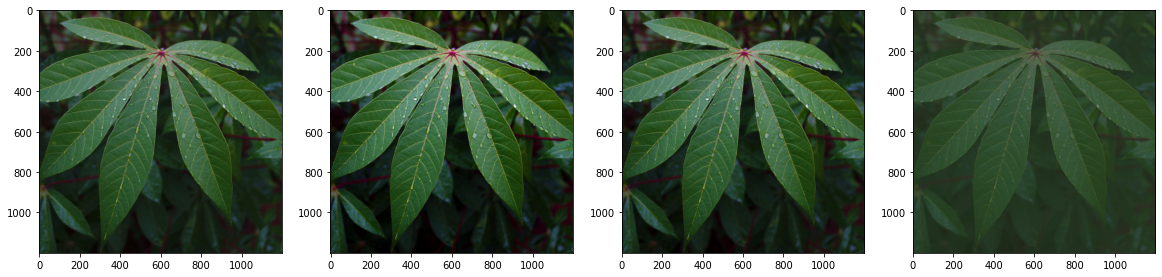

In [9]:
contrast_layer1 = layers.experimental.preprocessing.RandomContrast((0.3, 0.6))
contrast_layer2 = layers.experimental.preprocessing.RandomContrast((0., 0.2))
contrast_layer3 = layers.experimental.preprocessing.RandomContrast(0.9)

c_img1 = contrast_layer1(img_tensor)[0]
c_img2 = contrast_layer2(img_tensor)[0]
c_img3 = contrast_layer3(img_tensor)[0]

plt.figure(figsize=(20, 20))
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.subplot(1, 4, 2)
plt.imshow(c_img1)
plt.subplot(1, 4, 3)
plt.imshow(c_img2)
plt.subplot(1, 4, 4)
plt.imshow(c_img3)
plt.show()

MULTIPLE AUGMENTATIONS

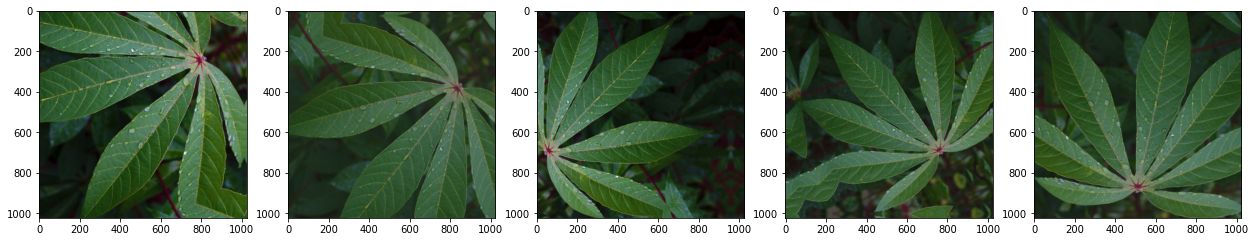

In [12]:
augmentations = models.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        layers.experimental.preprocessing.RandomZoom((-0.2, 0.2), interpolation='nearest'),
        layers.experimental.preprocessing.RandomContrast(0.3),
        layers.experimental.preprocessing.RandomRotation(factor=(-0.2, 0.2), interpolation='nearest'),
        layers.experimental.preprocessing.RandomTranslation( height_factor = 0.1,  width_factor = 0.1),
        layers.experimental.preprocessing.RandomCrop(1024, 1024)
    ]
)

aug_imgs = [ augmentations(img_tensor)[0] for i in range(5)]
plt.figure(figsize=(26, 26))
for i, aug_img in enumerate(aug_imgs):
  plt.subplot(1, 6, i+1)
  plt.imshow(aug_img)

plt.show()